<a href="https://colab.research.google.com/github/diego2017003/correlacao/blob/main/aula_correlacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

dados = pd.read_csv('https://raw.githubusercontent.com/diego2017003/correlacao/main/Diabetes.csv') 

dados.classe.replace({'tested_positive':1,'tested_negative':0},inplace=True)
dados.classe.unique()

array([1, 0])

In [11]:
dados.head()

,preg,plas,pres,skin,insu,mass,pedi,age,classe
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
dados.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,classe
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


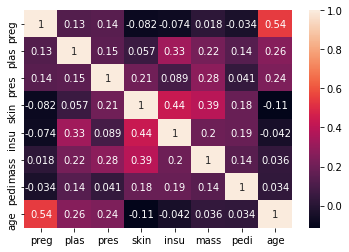

In [16]:
import seaborn as sns

correlacao = dados.drop(columns='classe').corr()

sns.heatmap(data=correlacao,annot=True)

In [23]:
from sklearn import preprocessing

x = dados.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.head()


,0,1,2,3,4,5,6,7,8
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


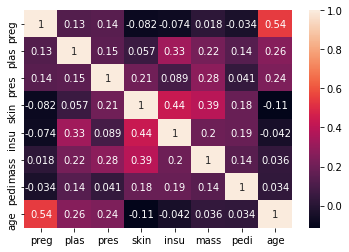

In [28]:
corr2 =  df.corr()

sns.heatmap(data=correlacao,annot=True)

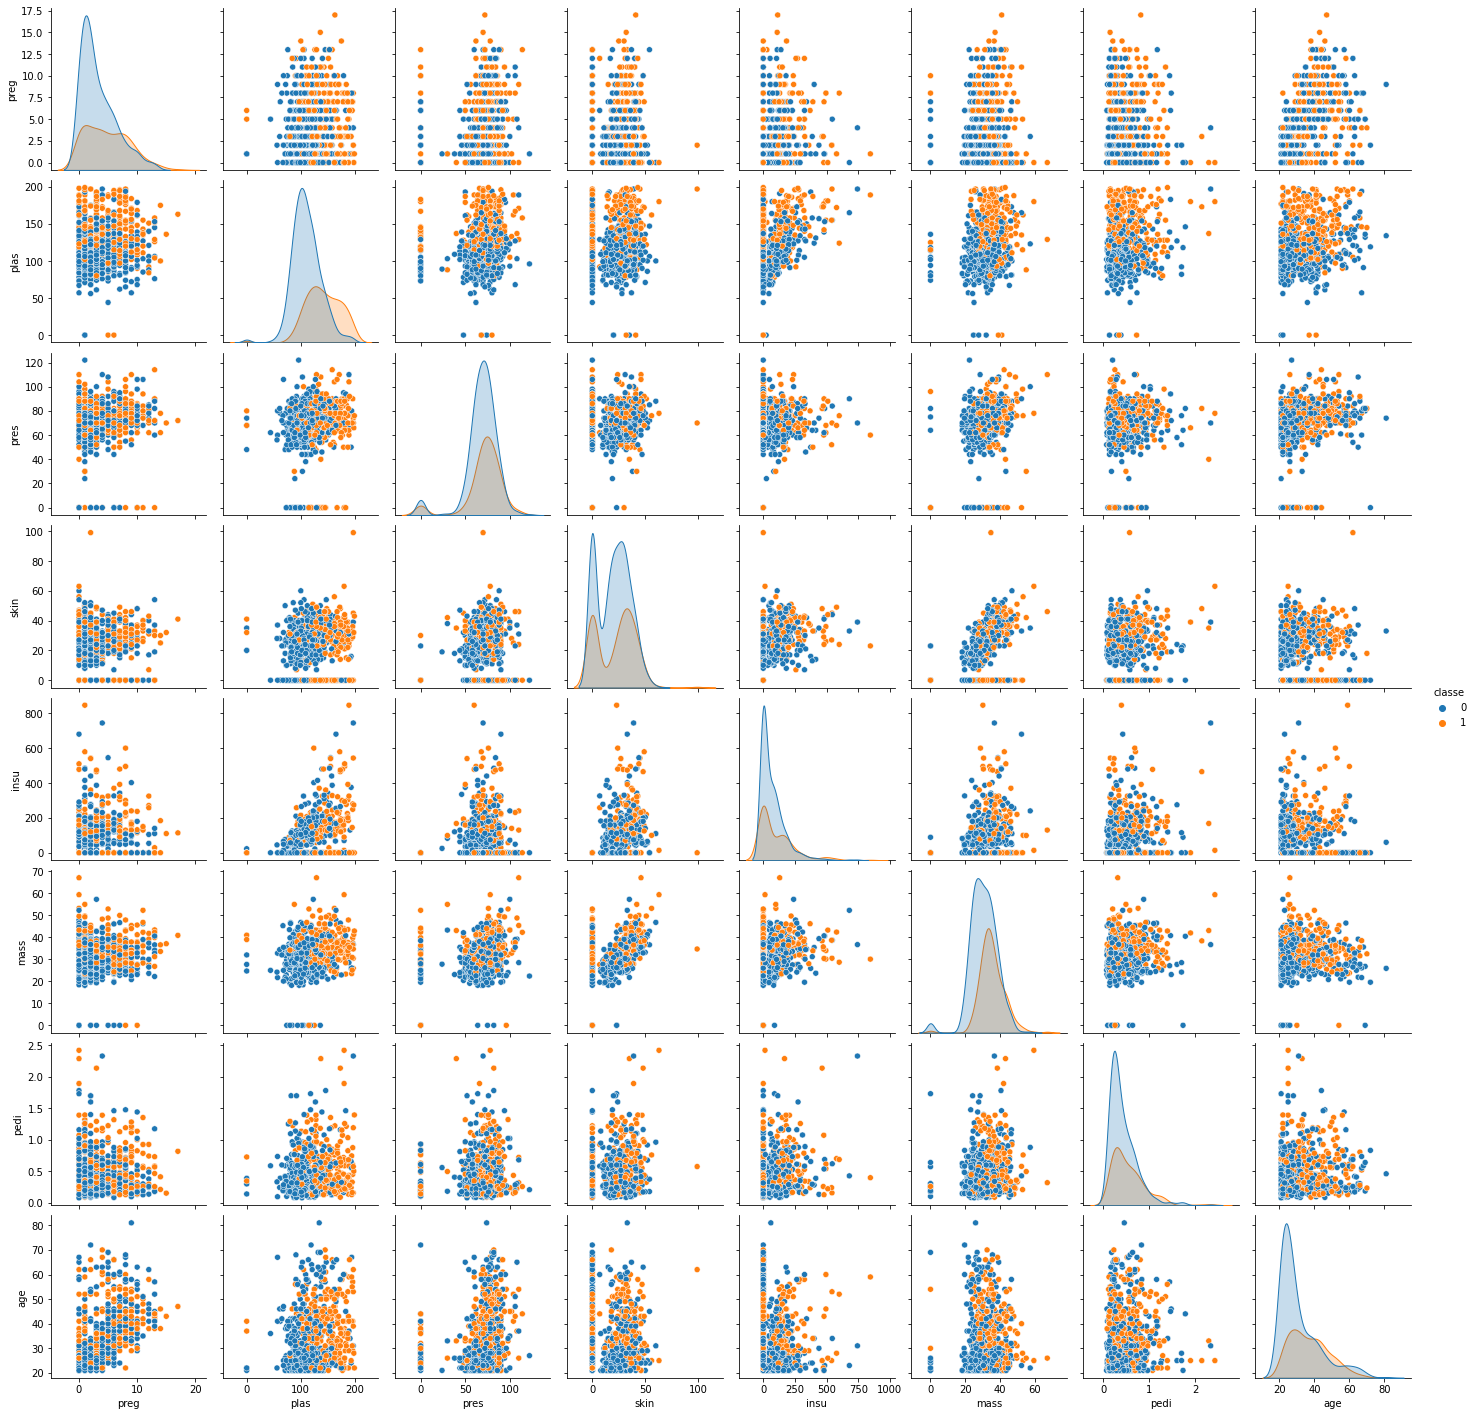

In [33]:
sns.pairplot(data=dados,hue='classe')

In [44]:
dados_reduzidos = dados.loc[ (dados['pres'] > 0) 
  & (dados['skin'] > 0) & (dados['insu'] > 0) & (dados['mass'] > 0)]

In [45]:
dados_reduzidos.head()

,preg,plas,pres,skin,insu,mass,pedi,age,classe
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


In [46]:
dados_reduzidos.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,classe
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000
mean,3.295165,122.315522,70.671756,29.122137,155.717557,33.072519,0.522476,30.839695,0.330789
std,3.209425,31.435992,12.481277,10.513128,118.879630,7.023947,0.345232,10.199903,0.471097
min,0.000000,0.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.000000,28.400000,0.270000,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.200000,0.447000,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


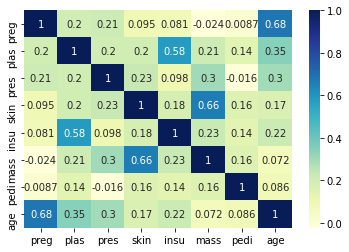

In [49]:
correlacao_reduzida = dados_reduzidos.drop(columns='classe').corr()

sns.heatmap(correlacao_reduzida,cmap="YlGnBu",annot=True)

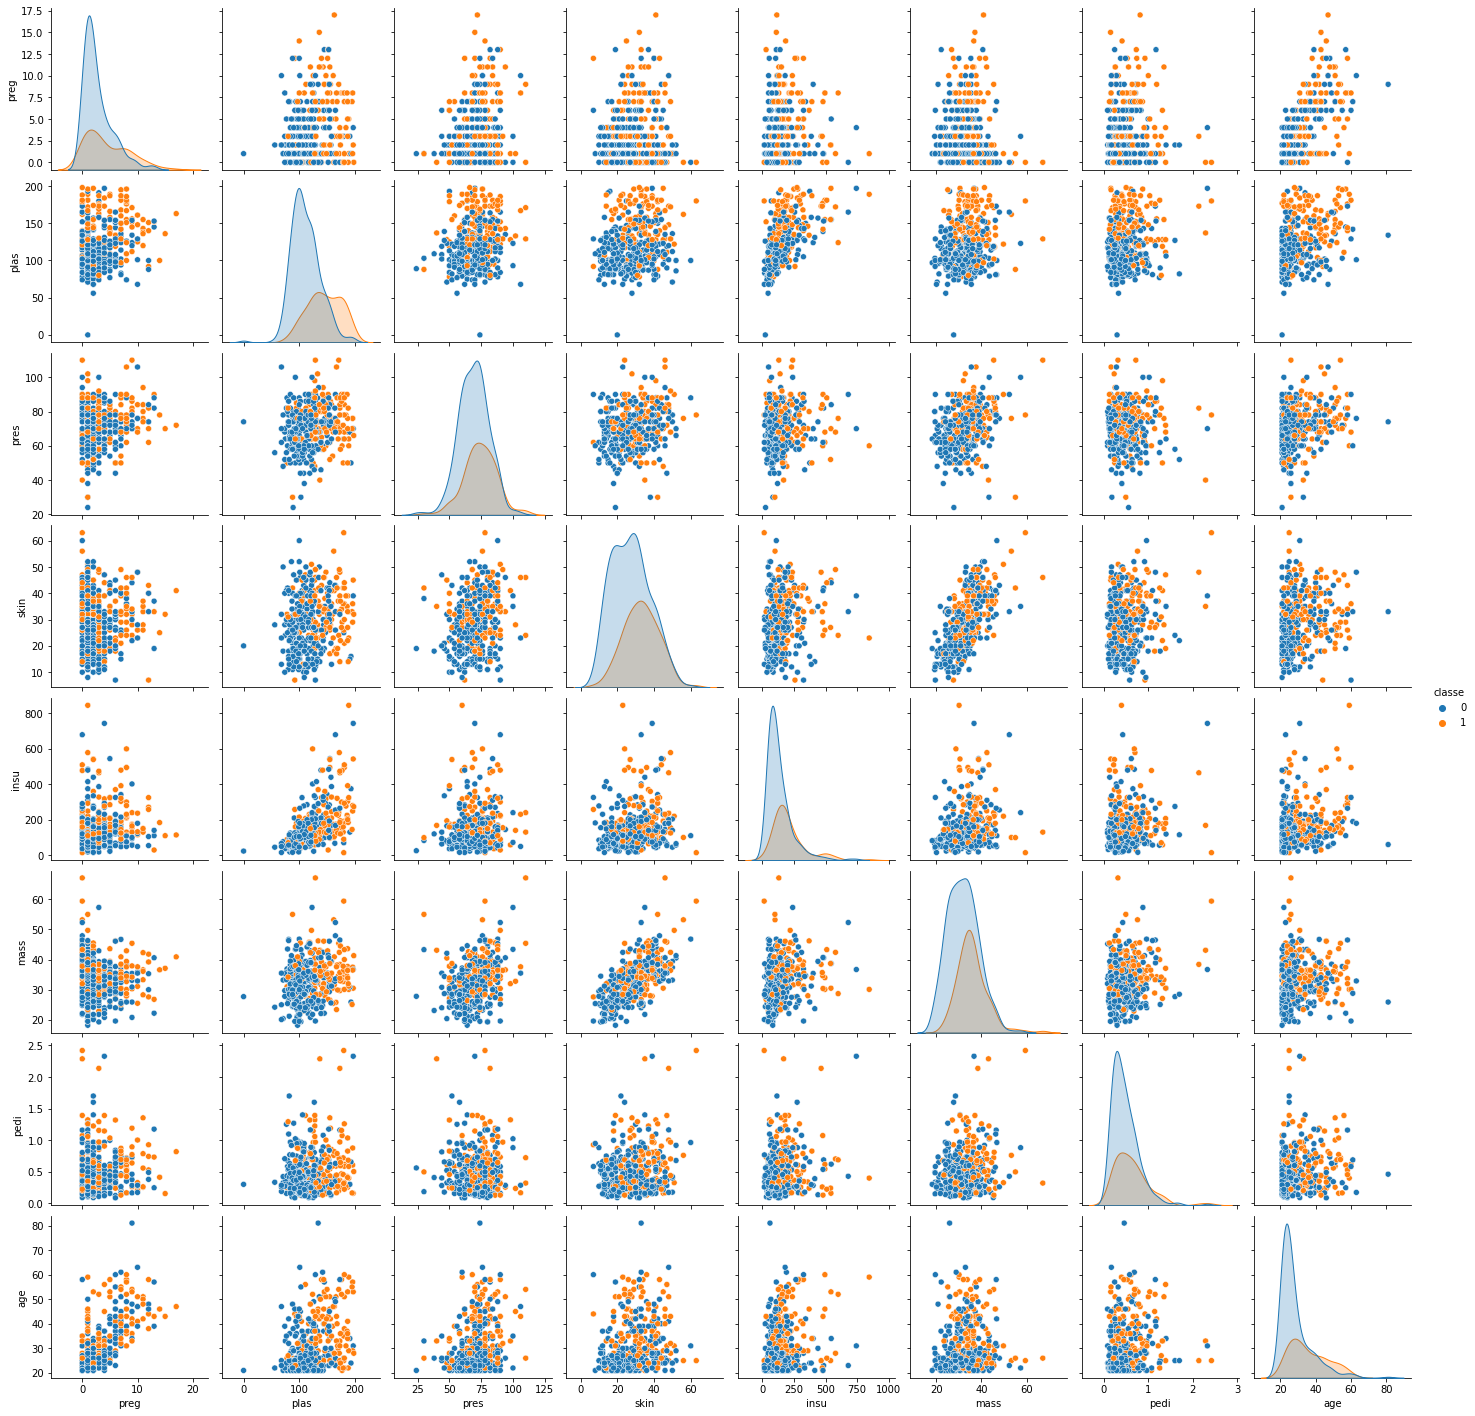

In [50]:
sns.pairplot(data=dados_reduzidos,hue='classe')

In [52]:
x = dados_reduzidos.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df2 = pd.DataFrame(x_scaled)
df2.head()

,0,1,2,3,4,5,6,7,8
0,0.058824,0.449495,0.488372,0.285714,0.096154,0.202454,0.035118,0.000000,0.0
1,0.000000,0.691919,0.186047,0.500000,0.185096,0.509202,0.943469,0.200000,1.0
2,0.176471,0.393939,0.302326,0.446429,0.088942,0.261759,0.069807,0.083333,1.0
3,0.117647,0.994949,0.534884,0.678571,0.635817,0.251534,0.031263,0.533333,1.0
4,0.058824,0.954545,0.418605,0.285714,1.000000,0.243354,0.134047,0.633333,1.0


In [54]:
df2.keys()

RangeIndex(start=0, stop=9, step=1)

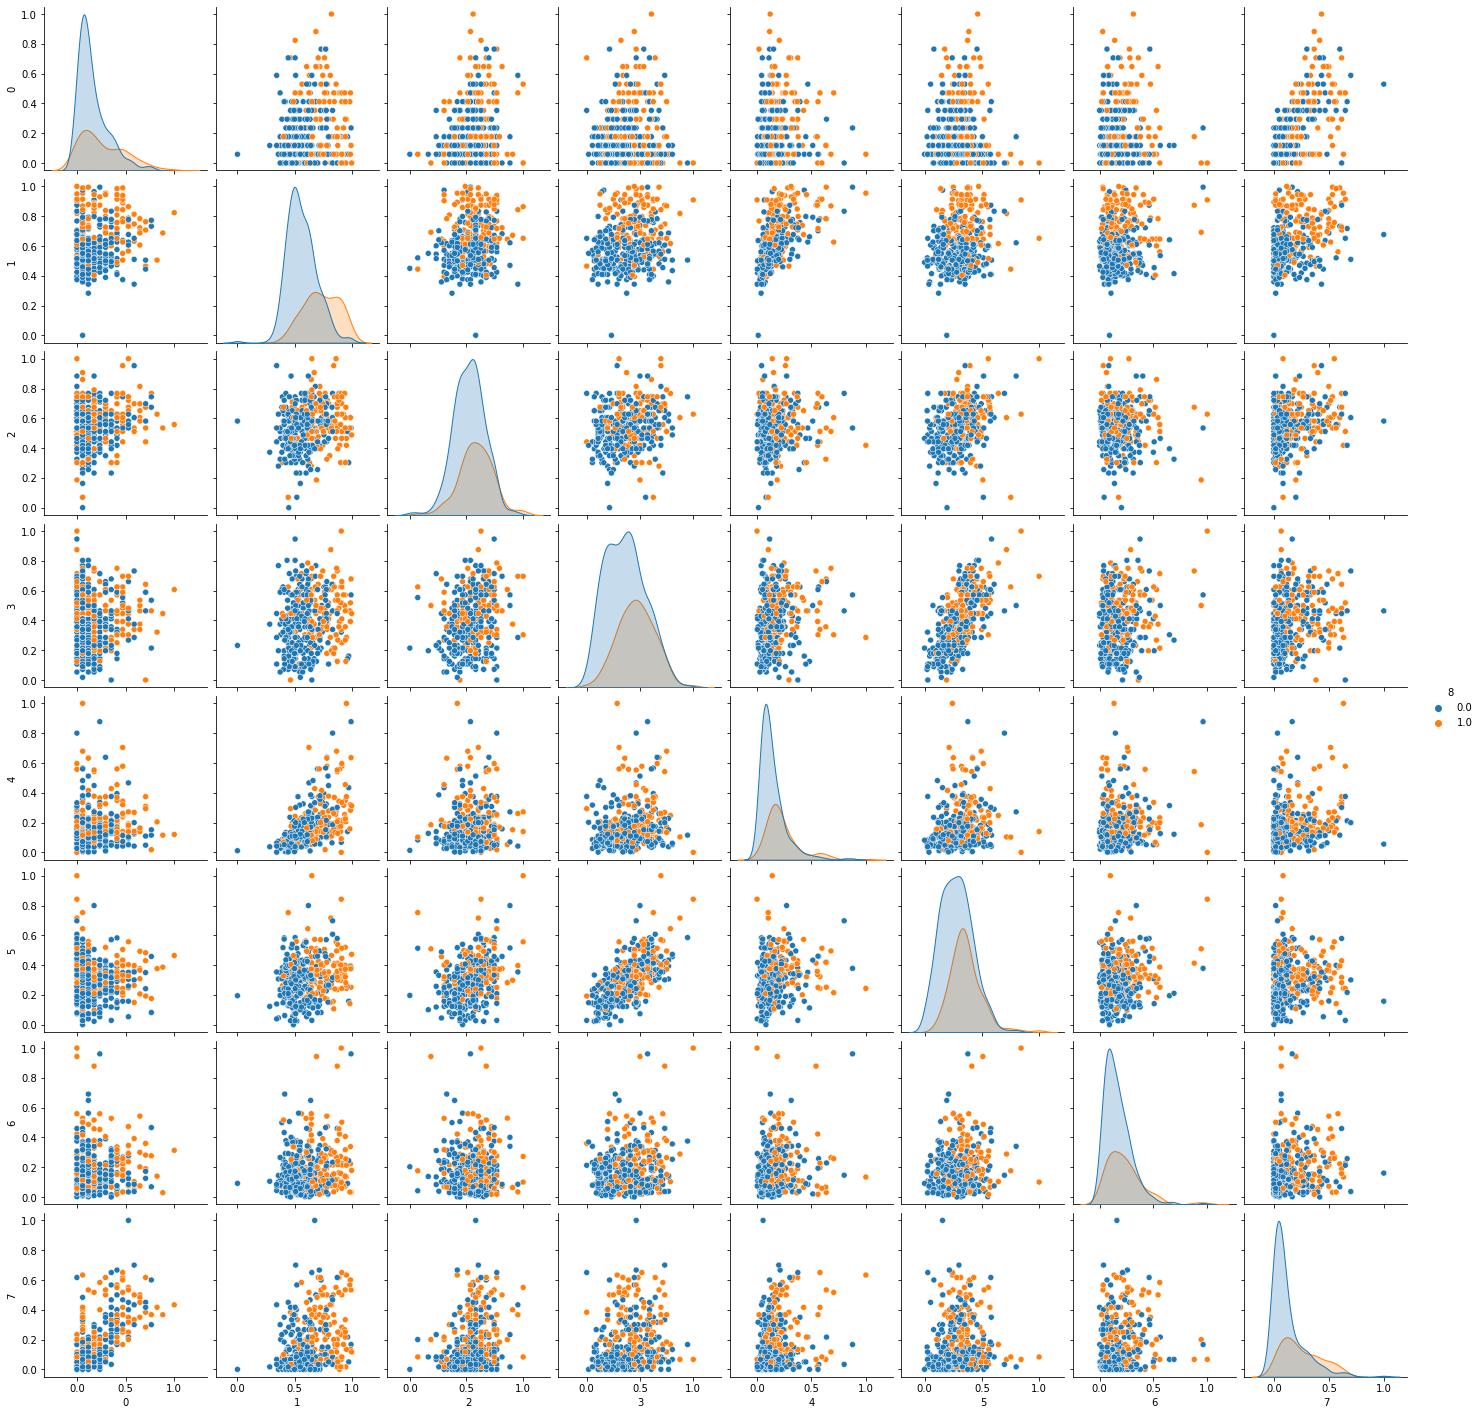

In [56]:
sns.pairplot(data = df2,hue=8)